# Credit Card Default Prediction
### The objective of this credit card default prediction project is to build a predictive model that accurately determines whether a client will default on their credit card payment. 
### Team members: Sneha Aluguvelly, Sai chowdary Aluri

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load the data

In [3]:
data = pd.read_csv('Downloads/default+of+credit+card+clients/default of credit card clients.csv')

## Data Exploration

In [4]:
data.shape

(30001, 25)

In [5]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [6]:
data.columns = data.iloc[0]  # Set the first row as the new column names


In [7]:
data = data.drop(index=0)
data.reset_index(drop=True, inplace=True)


In [8]:
data.shape

(30000, 25)

In [9]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [10]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [13]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,30000,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [14]:
data = data.apply(pd.to_numeric)


In [15]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Check for missing data

In [16]:
data.isnull().sum()


0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## Check for duplicate values

In [17]:
data.duplicated().sum()


np.int64(0)

## Check for undocumented values 

In [18]:
data['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [19]:
data['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [20]:
data['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [21]:
unique_values = data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(pd.Series.unique)
print(unique_values)


0
PAY_0    [2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6]
PAY_2    [2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8]
PAY_3    [-1, 0, 2, -2, 3, 4, 6, 7, 1, 5, 8]
PAY_4    [-1, 0, -2, 2, 3, 4, 5, 7, 6, 1, 8]
PAY_5       [-2, 0, -1, 2, 3, 5, 4, 7, 8, 6]
PAY_6       [-2, 2, 0, -1, 3, 6, 4, 7, 8, 5]
dtype: object


## Delete or group the undocumented values

In [22]:
# category '0' undocumented is deleted
data = data.drop(data[data['MARRIAGE']==0].index)

# categories 0, 5 and 6 are unknown and are deleted
data = data.drop(data[data['EDUCATION']==0].index)
data = data.drop(data[data['EDUCATION']==5].index)
data = data.drop(data[data['EDUCATION']==6].index)

In [23]:
repayment_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
data[repayment_columns] = data[repayment_columns].replace(-2, -1)

In [24]:
# rename variable 'PAY_0' to 'PAY_1' 
data.rename(columns={"PAY_0": "PAY_1"}, inplace=True)

In [25]:
# rename target variable: 'default.payment.next.month' to 'Default'
data.rename(columns={"default payment next month": "Default"}, inplace=True)

In [26]:
data = data.drop('ID', axis=1)


In [27]:
data.shape

(29601, 24)

## correlation

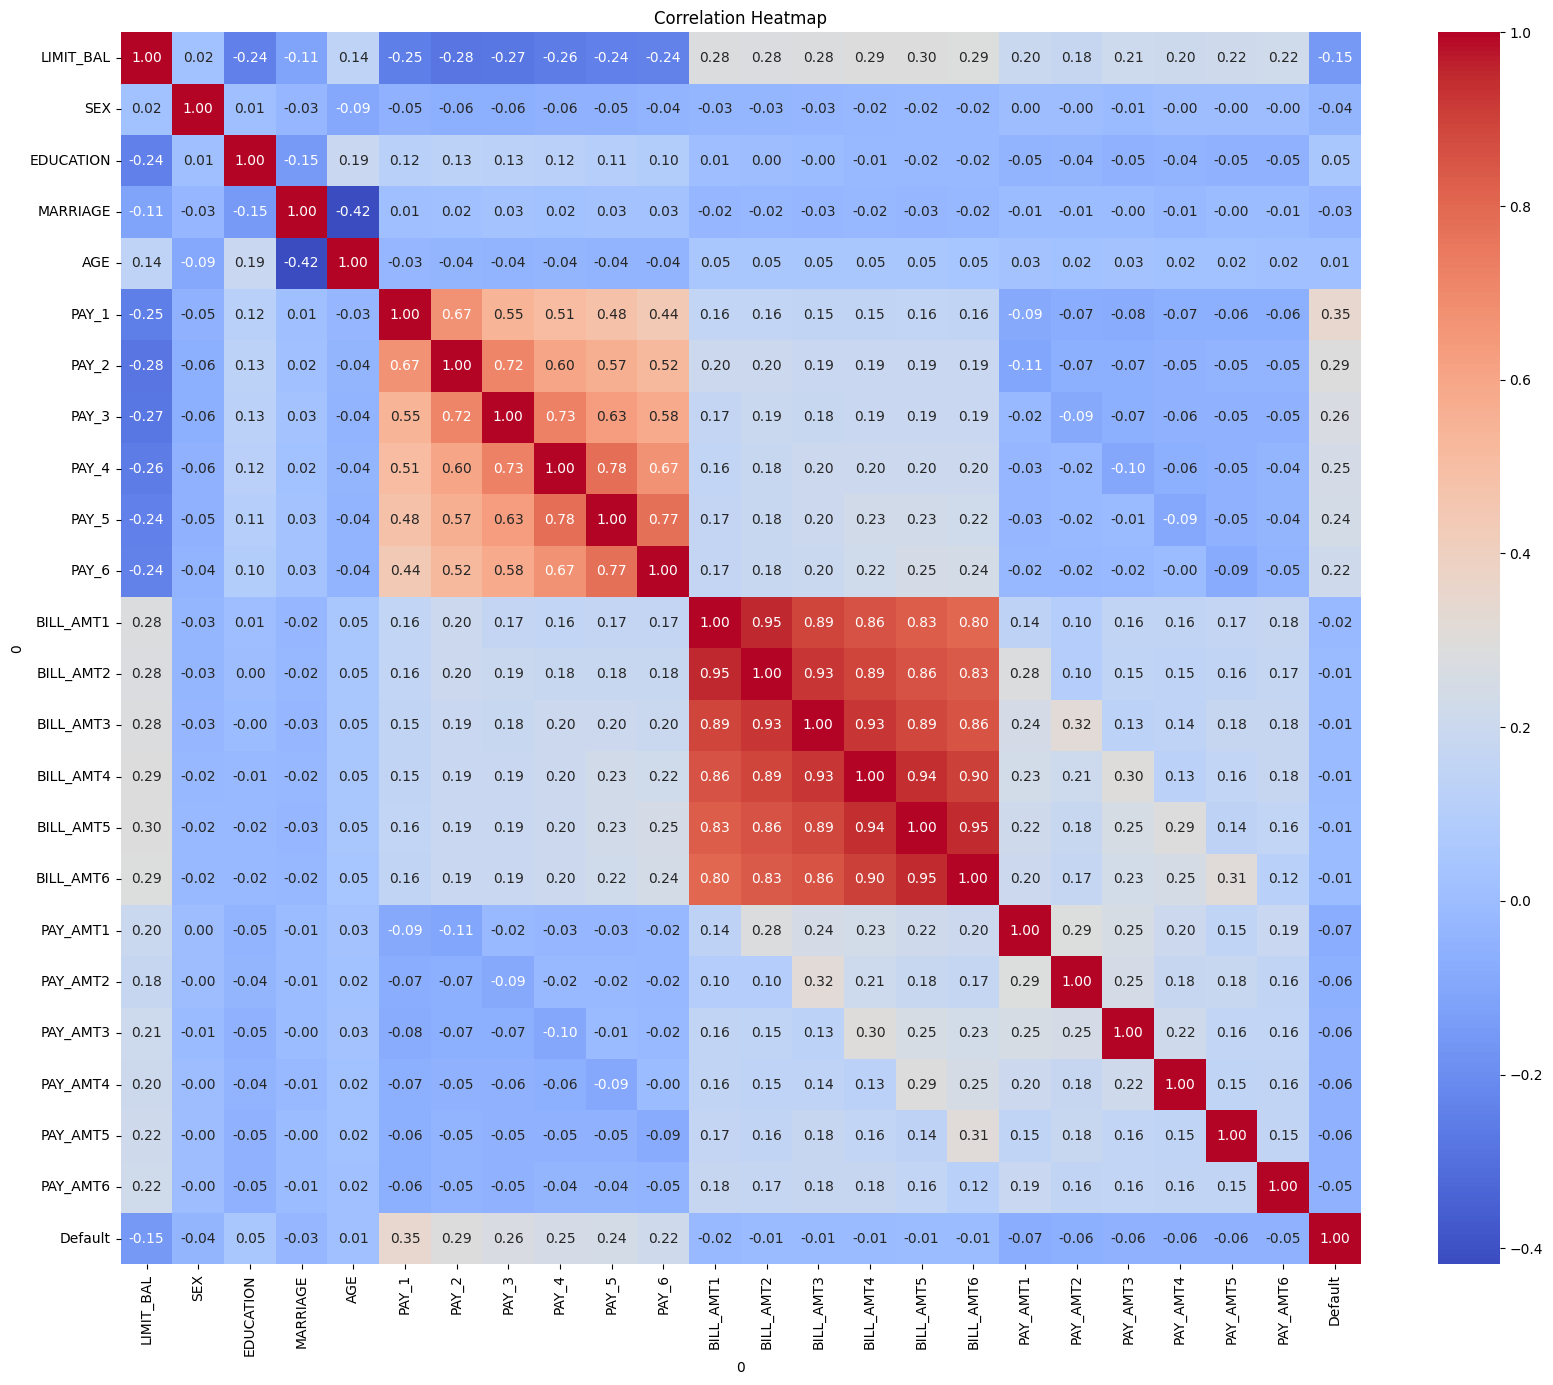

In [28]:
correlation_matrix = data.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [29]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [30]:
corr_features = correlation(data, 0.9)
len(set(corr_features))

5

In [31]:
corr_features


{'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'}

## Drop the columns with high correlation

In [32]:
data = data.drop(corr_features,axis=1)


## Distribution of categorical variables

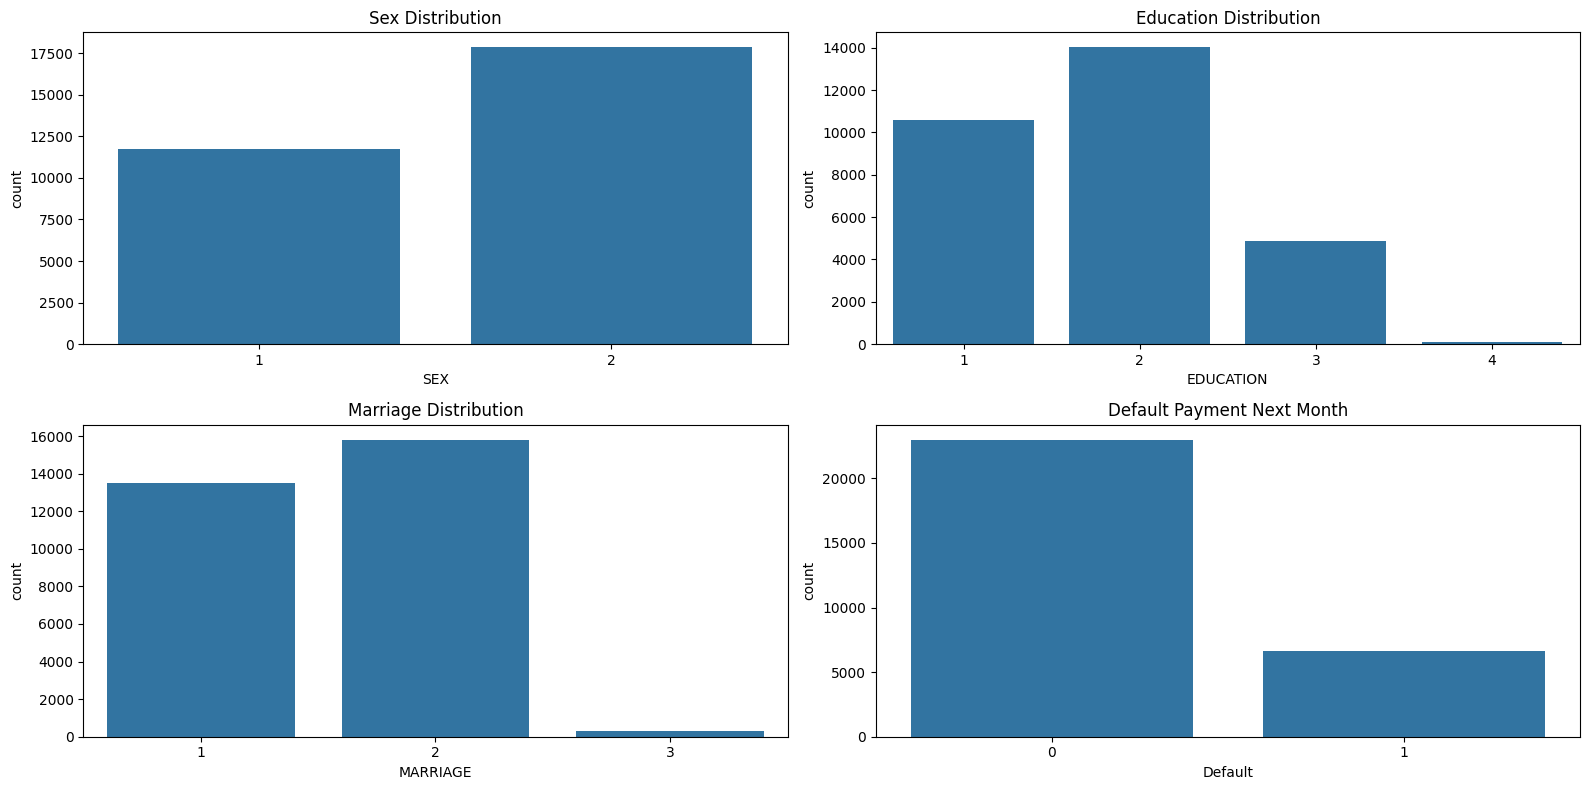

In [33]:
plt.figure(figsize=(16, 8))

# SEX Distribution
plt.subplot(2, 2, 1)
sns.countplot(x='SEX', data=data)
plt.title('Sex Distribution')

# EDUCATION Distribution
plt.subplot(2, 2, 2)
sns.countplot(x='EDUCATION', data=data)
plt.title('Education Distribution')

# MARRIAGE Distribution
plt.subplot(2, 2, 3)
sns.countplot(x='MARRIAGE', data=data)
plt.title('Marriage Distribution')

# Default Payment Next Month Distribution
plt.subplot(2, 2, 4)
sns.countplot(x='Default', data=data)
plt.title('Default Payment Next Month')

plt.tight_layout()
plt.show()


## Histograms for numerical variables


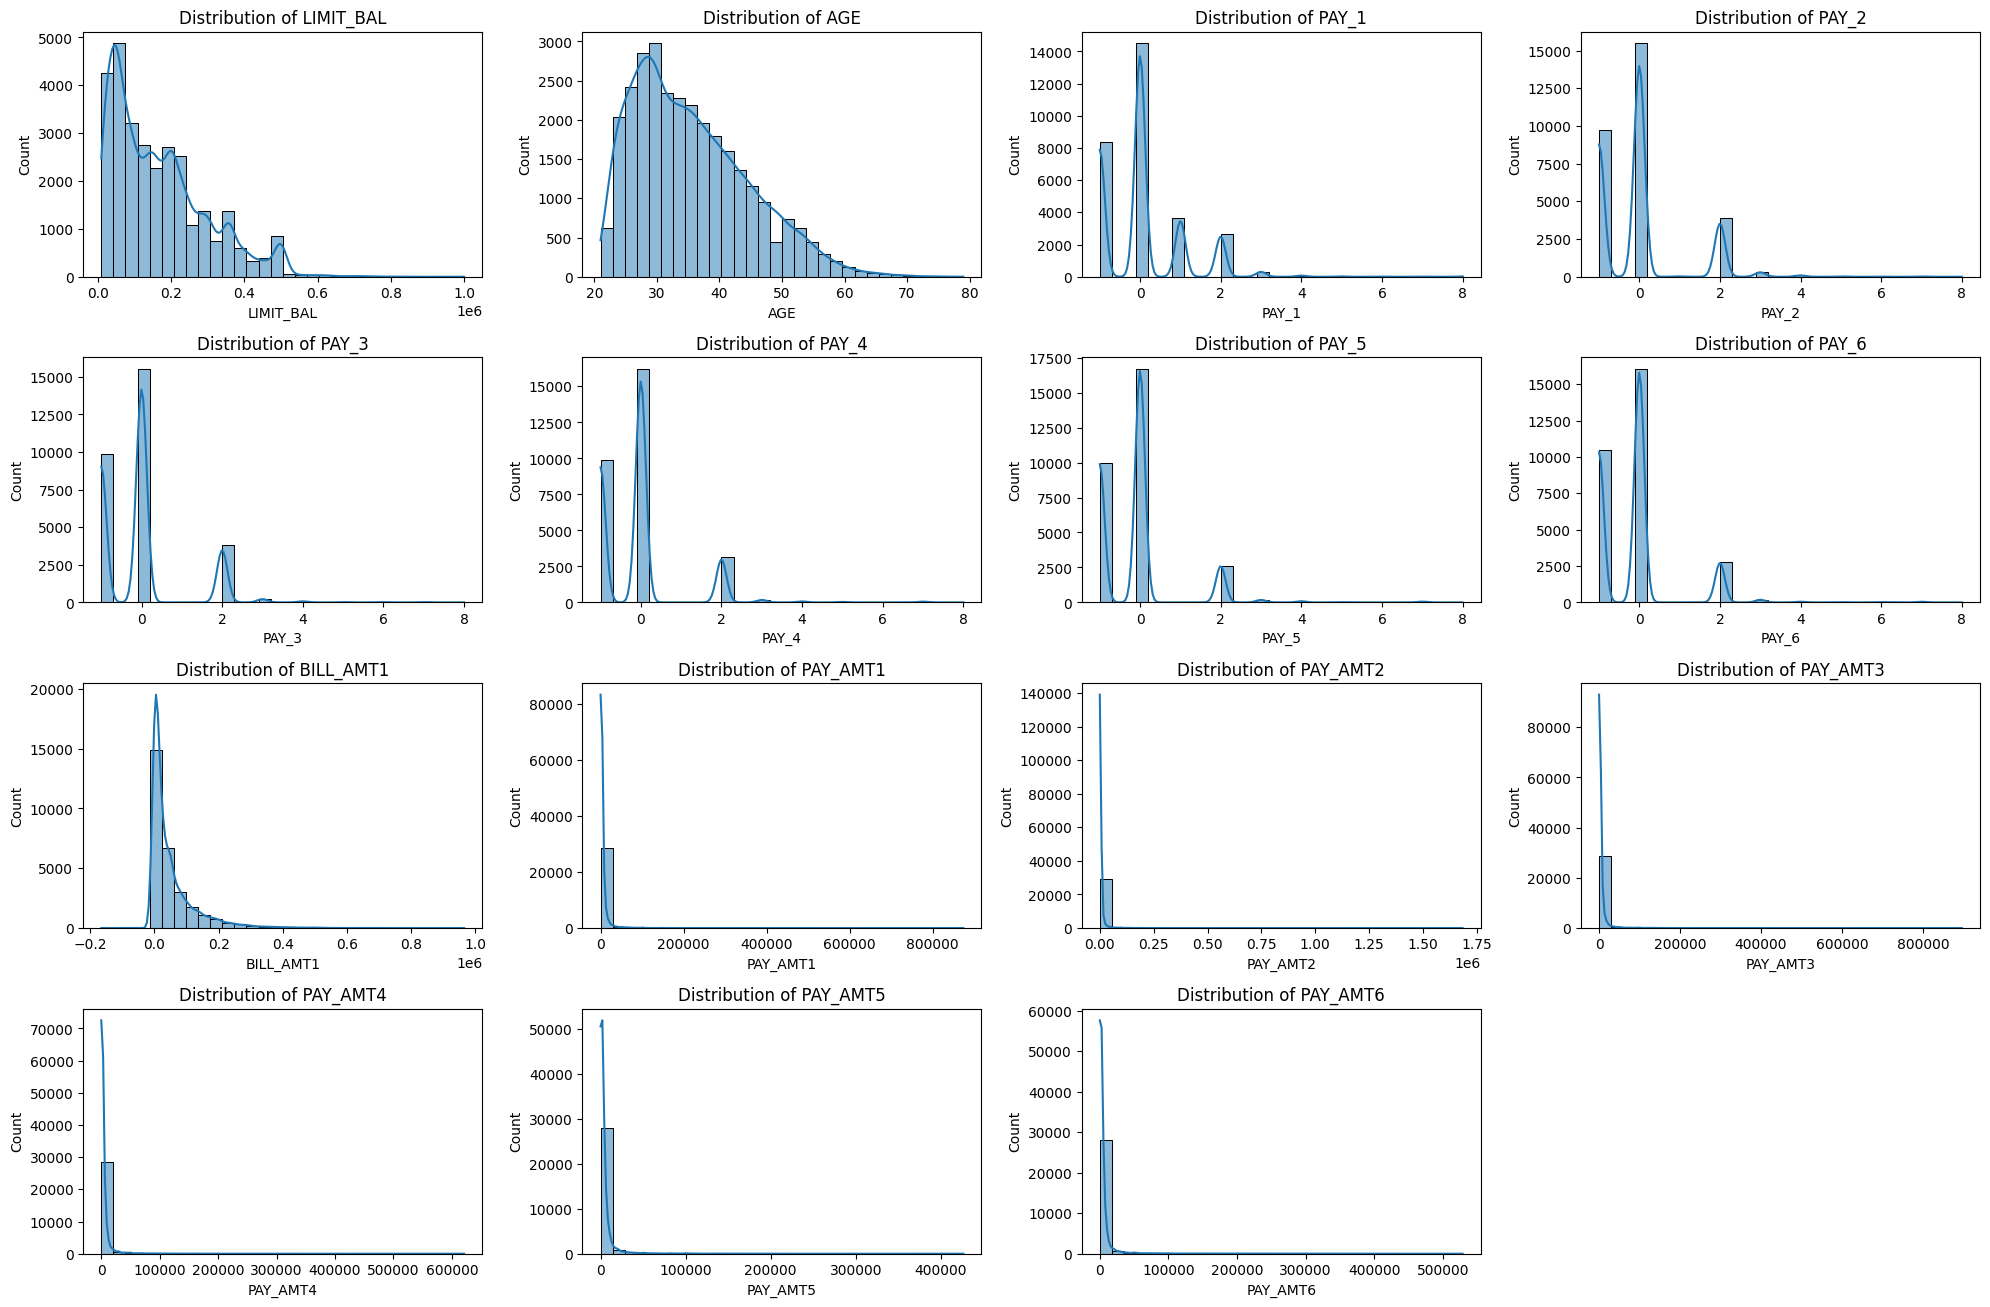

In [34]:
numerical_vars = ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',  
                  'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

plt.figure(figsize=(20, 16))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(5, 4, i)
    sns.histplot(data[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


## Boxplot

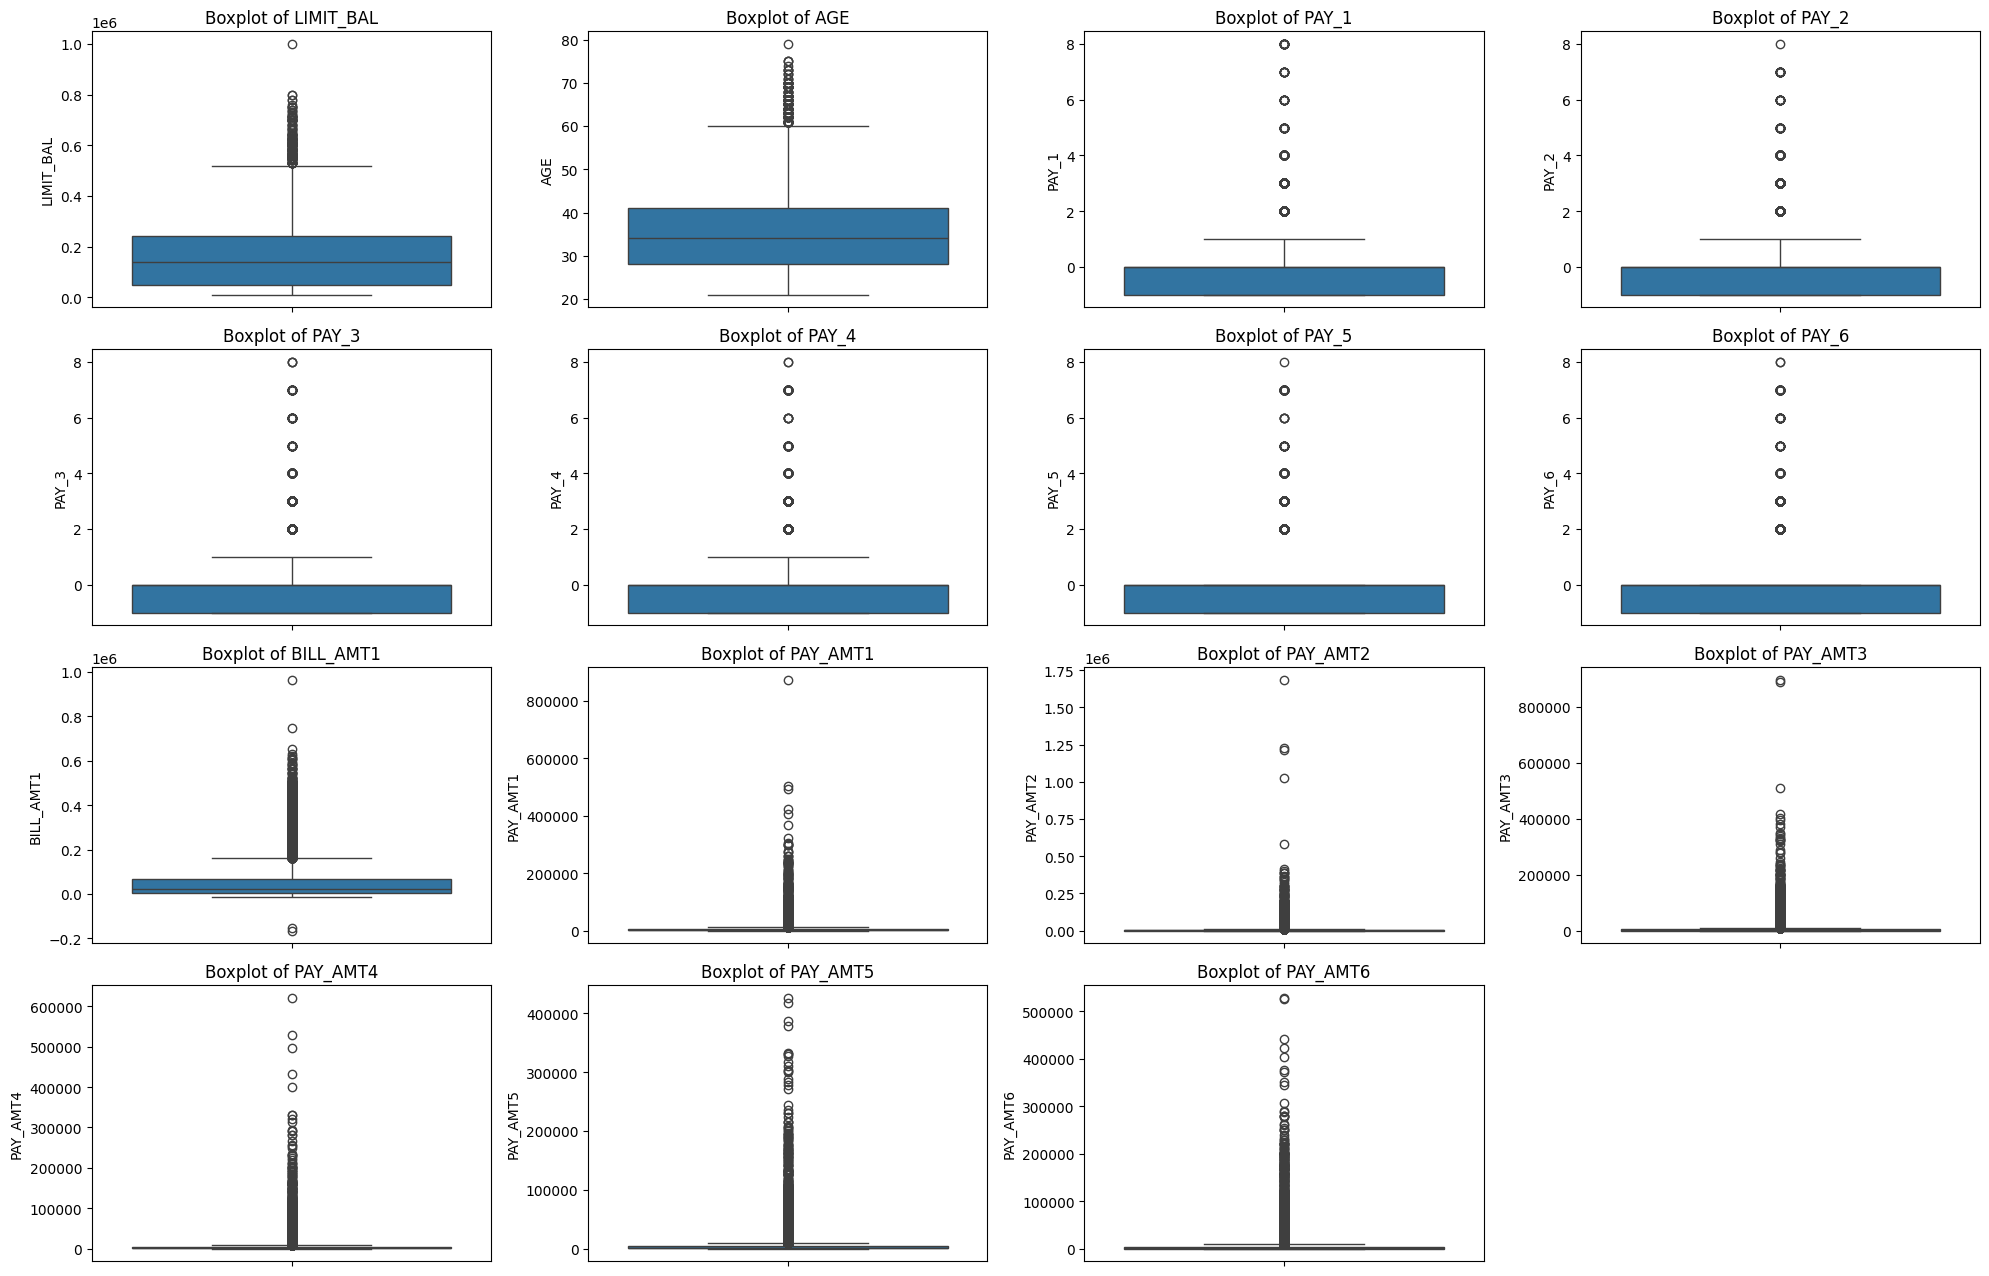

In [35]:
plt.figure(figsize=(20, 16))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=data[var])
    plt.title(f'Boxplot of {var}')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


In [36]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,167550.544914,1.603189,1.815479,1.555454,35.464072,0.076551,-0.005574,-0.027398,-0.073477,-0.112665,-0.125198,50957.432012,5649.560319,5.894788e+03,5198.415898,4828.659268,4795.032735,5181.326374,0.223134
std,129944.020953,0.489244,0.710399,0.518092,9.213243,0.992174,1.038809,1.028262,0.990891,0.945531,0.952628,73370.242404,16568.264941,2.308919e+04,17580.914806,15711.057992,15244.217154,17657.260739,0.416355
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-165580.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3528.000000,1000.000000,8.250000e+02,390.000000,298.000000,259.000000,138.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22259.000000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66623.000000,5005.000000,5.000000e+03,4500.000000,4014.000000,4042.000000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


## Encoding

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29601 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  29601 non-null  int64
 1   SEX        29601 non-null  int64
 2   EDUCATION  29601 non-null  int64
 3   MARRIAGE   29601 non-null  int64
 4   AGE        29601 non-null  int64
 5   PAY_1      29601 non-null  int64
 6   PAY_2      29601 non-null  int64
 7   PAY_3      29601 non-null  int64
 8   PAY_4      29601 non-null  int64
 9   PAY_5      29601 non-null  int64
 10  PAY_6      29601 non-null  int64
 11  BILL_AMT1  29601 non-null  int64
 12  PAY_AMT1   29601 non-null  int64
 13  PAY_AMT2   29601 non-null  int64
 14  PAY_AMT3   29601 non-null  int64
 15  PAY_AMT4   29601 non-null  int64
 16  PAY_AMT5   29601 non-null  int64
 17  PAY_AMT6   29601 non-null  int64
 18  Default    29601 non-null  int64
dtypes: int64(19)
memory usage: 4.5 MB


In [38]:
# One-Hot Encode Nominal Features (SEX, MARRIAGE)
data_encoded = pd.get_dummies(data, columns=['SEX', 'MARRIAGE'], drop_first=True)

# Label Encode Ordinal Feature (EDUCATION)
education_map = {1: 3, 2: 2, 3: 1, 4: 0}  # Assuming an ordinal scale, you can adjust as needed
data_encoded['EDUCATION'] = data_encoded['EDUCATION'].map(education_map)


In [39]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29601 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LIMIT_BAL   29601 non-null  int64
 1   EDUCATION   29601 non-null  int64
 2   AGE         29601 non-null  int64
 3   PAY_1       29601 non-null  int64
 4   PAY_2       29601 non-null  int64
 5   PAY_3       29601 non-null  int64
 6   PAY_4       29601 non-null  int64
 7   PAY_5       29601 non-null  int64
 8   PAY_6       29601 non-null  int64
 9   BILL_AMT1   29601 non-null  int64
 10  PAY_AMT1    29601 non-null  int64
 11  PAY_AMT2    29601 non-null  int64
 12  PAY_AMT3    29601 non-null  int64
 13  PAY_AMT4    29601 non-null  int64
 14  PAY_AMT5    29601 non-null  int64
 15  PAY_AMT6    29601 non-null  int64
 16  Default     29601 non-null  int64
 17  SEX_2       29601 non-null  bool 
 18  MARRIAGE_2  29601 non-null  bool 
 19  MARRIAGE_3  29601 non-null  bool 
dtypes: bool(3), int64(17)
memory usag

In [40]:
data_encoded.head()

,LIMIT_BAL,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,SEX_2,MARRIAGE_2,MARRIAGE_3
0,20000,2,24,2,2,-1,-1,-1,-1,3913,0,689,0,0,0,0,1,True,False,False
1,120000,2,26,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000,1,True,True,False
2,90000,2,34,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,0,True,True,False
3,50000,2,37,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,0,True,False,False
4,50000,2,57,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679,0,False,False,False


In [41]:
data_encoded.describe()

,LIMIT_BAL,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,167550.544914,2.184521,35.464072,0.076551,-0.005574,-0.027398,-0.073477,-0.112665,-0.125198,50957.432012,5649.560319,5.894788e+03,5198.415898,4828.659268,4795.032735,5181.326374,0.223134
std,129944.020953,0.710399,9.213243,0.992174,1.038809,1.028262,0.990891,0.945531,0.952628,73370.242404,16568.264941,2.308919e+04,17580.914806,15711.057992,15244.217154,17657.260739,0.416355
min,10000.000000,0.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-165580.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,2.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3528.000000,1000.000000,8.250000e+02,390.000000,298.000000,259.000000,138.000000,0.000000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22259.000000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,3.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66623.000000,5005.000000,5.000000e+03,4500.000000,4014.000000,4042.000000,4000.000000,0.000000
max,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


## Separate features and target


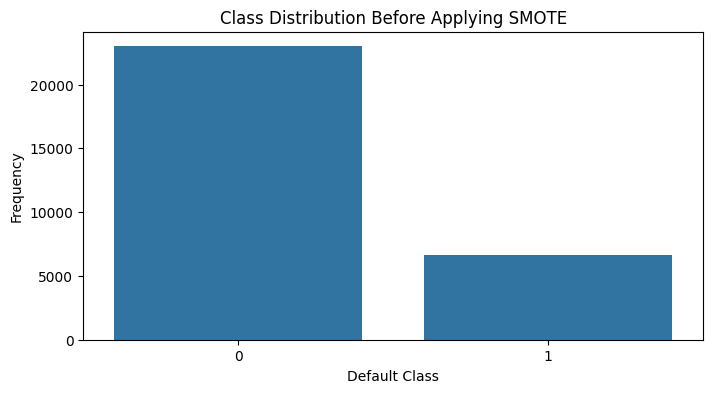

In [68]:
# Importing necessary libraries
from imblearn.over_sampling import SMOTE

# Original class distribution visualization
plt.figure(figsize=(8, 4))
sns.countplot(x='Default', data=data_encoded)
plt.title('Class Distribution Before Applying SMOTE')
plt.xlabel('Default Class')
plt.ylabel('Frequency')
plt.show()

In [57]:
X = data_encoded.drop('Default', axis=1)
y = data_encoded['Default']


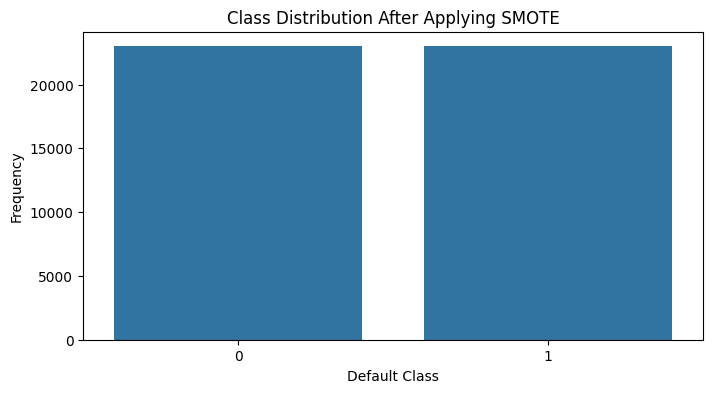

Original dataset shape: Default
0    22996
1     6605
Name: count, dtype: int64
Resampled dataset shape: Default
1    22996
0    22996
Name: count, dtype: int64


In [69]:


# Applying SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Resampled class distribution visualization
plt.figure(figsize=(8, 4))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After Applying SMOTE')
plt.xlabel('Default Class')
plt.ylabel('Frequency')
plt.show()

# Confirming the balanced class proportions
print("Original dataset shape:", y.value_counts())
print("Resampled dataset shape:", pd.Series(y_resampled).value_counts())


## Split data into training and testing sets


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Standardize features


In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
print("Standard Scaled Training Data Sample:")
print(pd.DataFrame(X_train, columns=X.columns).head())


Standard Scaled Training Data Sample:
   LIMIT_BAL  EDUCATION       AGE     PAY_1     PAY_2     PAY_3     PAY_4  \
0   0.517343   1.345925  0.412698  1.749089  0.804484  0.858477 -0.046946   
1  -0.353094  -0.080237 -1.179219  0.758475  1.739811 -0.094313 -0.046946   
2  -0.827877  -0.080237 -1.292927 -0.232139 -0.130844 -0.094313 -0.046946   
3   1.150387  -1.506399  1.436073  0.758475  2.675138  1.811266 -1.007090   
4  -0.827877  -0.080237 -0.724386  1.749089  1.739811 -0.094313 -0.046946   

      PAY_5     PAY_6  BILL_AMT1  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0 -0.006465  0.014379   1.533014 -0.075019  0.071809  0.088996  0.033039   
1 -0.006465  0.014379   0.848361 -0.060870  0.052395 -0.007364 -0.082522   
2 -0.006465  0.014379  -0.421057  0.014318 -0.157876 -0.155037 -0.259870   
3 -0.006465 -0.989524  -0.680948 -0.274062 -0.240958 -0.231418 -0.295127   
4  1.992517  2.022186  -0.274717 -0.233803 -0.132937 -0.143248 -0.224400   

   PAY_AMT5  PAY_AMT6     SEX_2  MARRIAGE_

## Define models 


In [62]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "K-Nearest Neighbors (K=5)": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}


## Train and test the model

Results for Logistic Regression:

Accuracy: 0.7174
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      4599
           1       0.72      0.71      0.72      4600

    accuracy                           0.72      9199
   macro avg       0.72      0.72      0.72      9199
weighted avg       0.72      0.72      0.72      9199

Confusion Matrix:
 [[3321 1278]
 [1322 3278]]


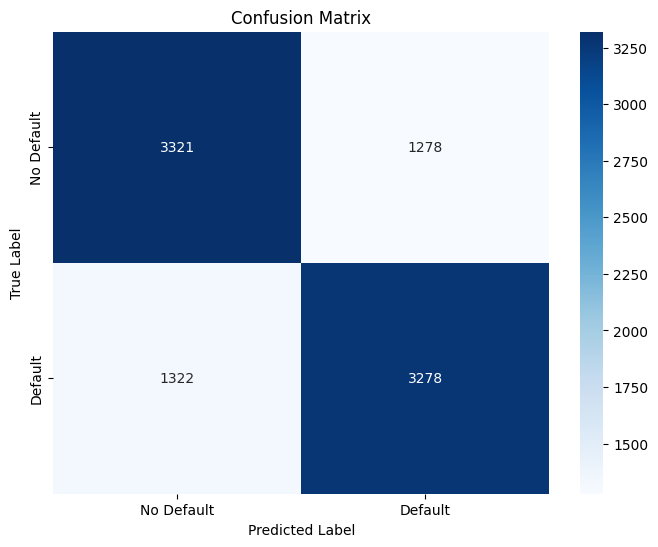



Results for Random Forest:

Accuracy: 0.8424
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      4599
           1       0.86      0.82      0.84      4600

    accuracy                           0.84      9199
   macro avg       0.84      0.84      0.84      9199
weighted avg       0.84      0.84      0.84      9199

Confusion Matrix:
 [[3970  629]
 [ 821 3779]]


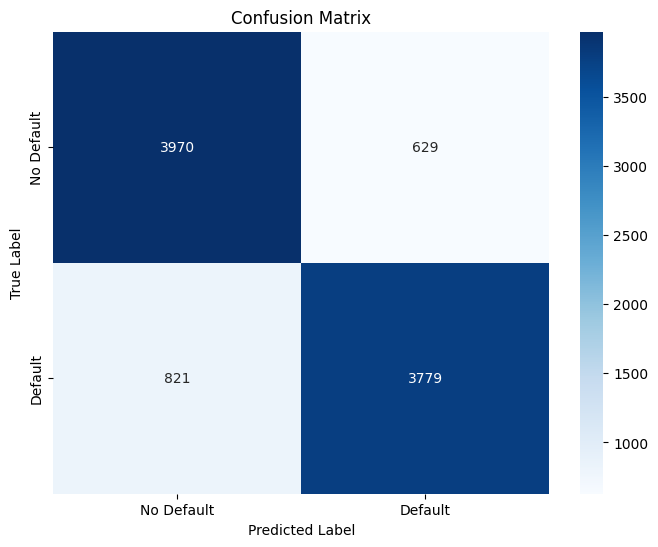



Results for K-Nearest Neighbors (K=5):

Accuracy: 0.7551
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      4599
           1       0.75      0.77      0.76      4600

    accuracy                           0.76      9199
   macro avg       0.76      0.76      0.75      9199
weighted avg       0.76      0.76      0.75      9199

Confusion Matrix:
 [[3388 1211]
 [1042 3558]]


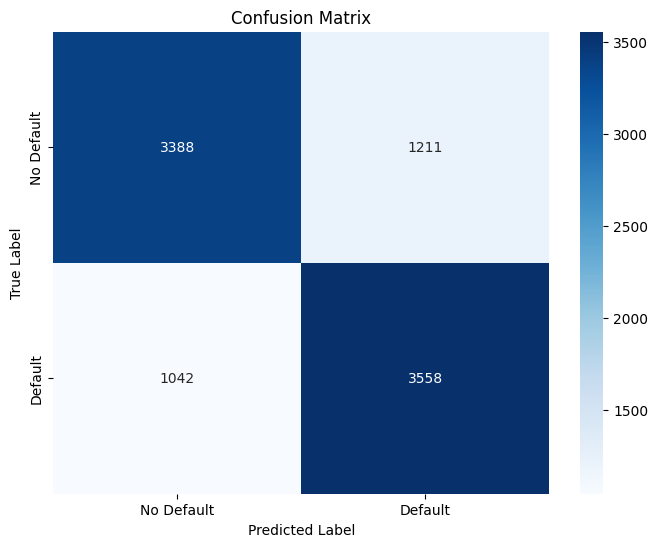



Results for Naive Bayes:

Accuracy: 0.6005
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.30      0.43      4599
           1       0.56      0.90      0.69      4600

    accuracy                           0.60      9199
   macro avg       0.66      0.60      0.56      9199
weighted avg       0.66      0.60      0.56      9199

Confusion Matrix:
 [[1381 3218]
 [ 457 4143]]


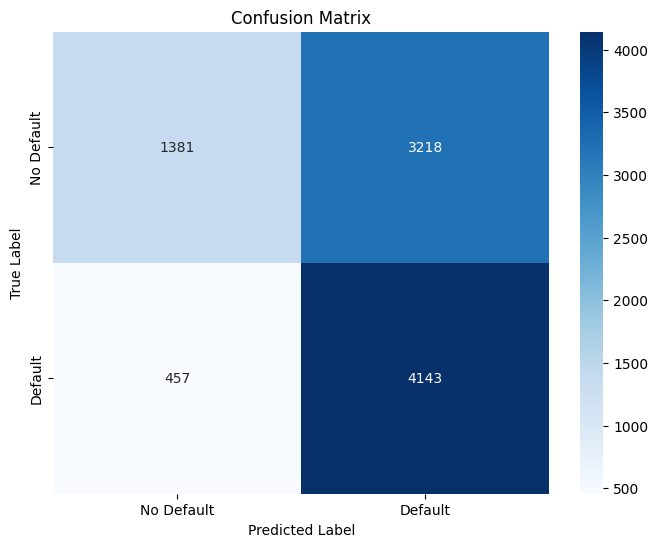

In [67]:
# Dictionary to store the performance of each model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Test the model
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and other metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": conf_matrix
    }
    # Print results for each model
    print(f"Results for {model_name}:\n")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)

    # Optionally, create a ConfusionMatrixDisplay for better visualization
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    
    # Set up the matplotlib figure
    plt.figure(figsize=(8, 6))
    
    # Visualize the confusion matrix using seaborn heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Default', 'Default'],
                yticklabels=['No Default', 'Default'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    print("\n" + "="*50 + "\n")
    

## Tuning

--- Tuning Logistic Regression ---
Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression: 0.7179

--- Tuning Random Forest ---
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.8285

--- Tuning K-Nearest Neighbors (K=5) ---
Best parameters for K-Nearest Neighbors (K=5): {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation accuracy for K-Nearest Neighbors (K=5): 0.7740


--- Results for Logistic Regression (Tuned) ---
Accuracy: 0.7175
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      4599
           1       0.72      0.71      0.72      4600

    accuracy                           0.72      9199
   macro avg       0.72      0.72      0.72      9199
weighted avg       0.72      0.72      0.72      9199

C

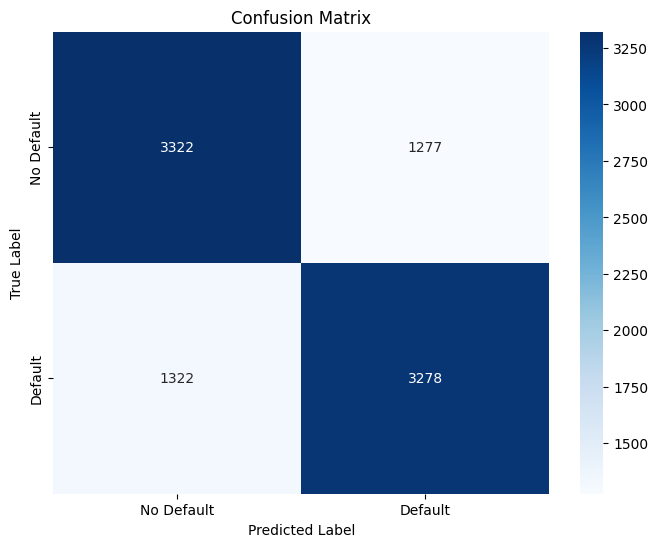




--- Results for Random Forest (Tuned) ---
Accuracy: 0.8431
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      4599
           1       0.86      0.82      0.84      4600

    accuracy                           0.84      9199
   macro avg       0.84      0.84      0.84      9199
weighted avg       0.84      0.84      0.84      9199

Confusion Matrix:
 [[3972  627]
 [ 816 3784]]


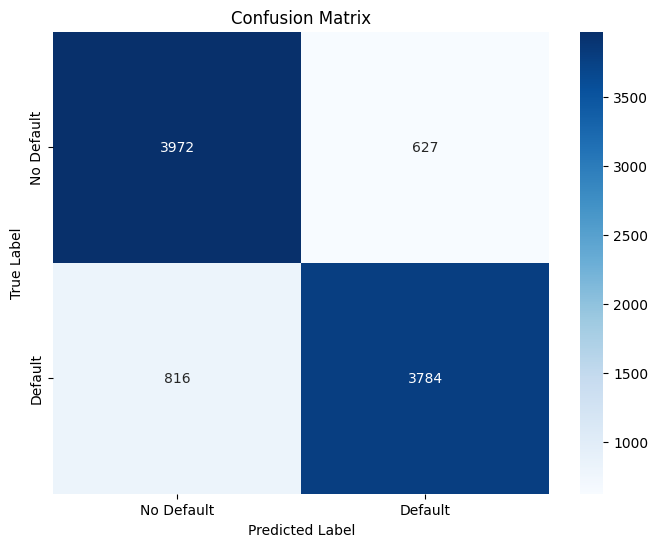




--- Results for K-Nearest Neighbors (K=5) (Tuned) ---
Accuracy: 0.7886
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78      4599
           1       0.77      0.82      0.80      4600

    accuracy                           0.79      9199
   macro avg       0.79      0.79      0.79      9199
weighted avg       0.79      0.79      0.79      9199

Confusion Matrix:
 [[3466 1133]
 [ 812 3788]]


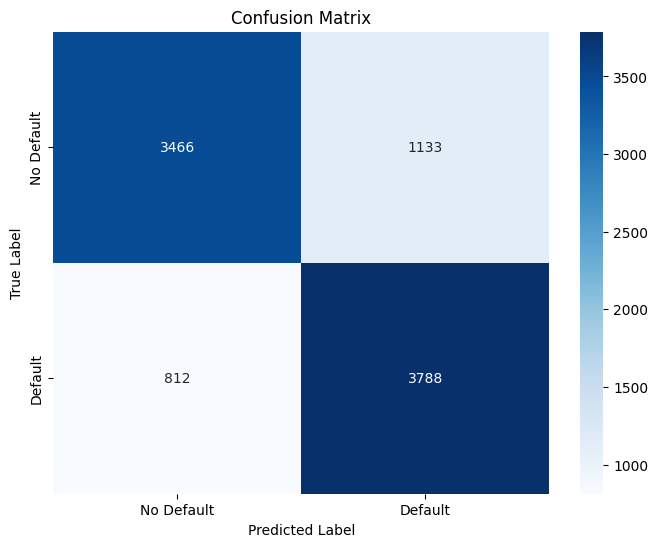




--- Results for Naive Bayes (Tuned) ---
Accuracy: 0.6005
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.30      0.43      4599
           1       0.56      0.90      0.69      4600

    accuracy                           0.60      9199
   macro avg       0.66      0.60      0.56      9199
weighted avg       0.66      0.60      0.56      9199

Confusion Matrix:
 [[1381 3218]
 [ 457 4143]]


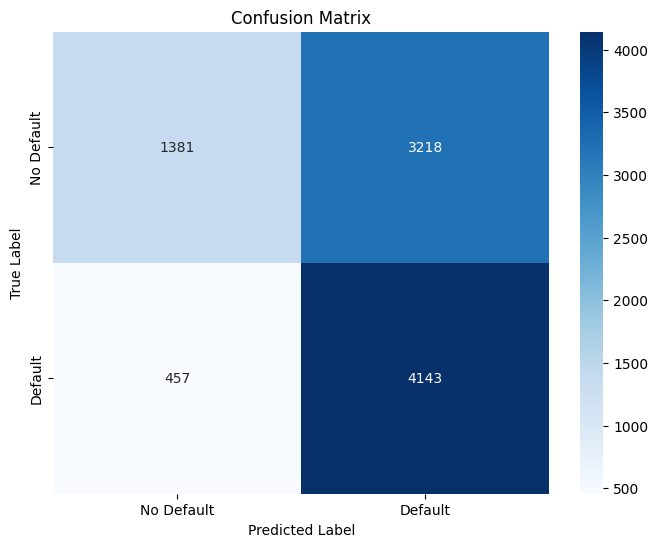

In [64]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for tuning
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "K-Nearest Neighbors (K=5)": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Tuning models and storing best models
best_models = {}

for model_name, model in models.items():
    if model_name in param_grids:  # Only tune if there are parameters to tune
        print(f"--- Tuning {model_name} ---")
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        best_models[model_name] = best_model
        
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}\n")
    else:
        # Use the original model if no tuning needed
        best_models[model_name] = model.fit(X_train, y_train)

# Evaluate tuned models on the test set
for model_name, model in best_models.items():
    print(f"\n--- Results for {model_name} (Tuned) ---")
    y_pred = model.predict(X_test)
    
    # Calculate and display metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    # Optionally, create a ConfusionMatrixDisplay for better visualization
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    
    # Set up the matplotlib figure
    plt.figure(figsize=(8, 6))
    
    # Visualize the confusion matrix using seaborn heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Default', 'Default'],
                yticklabels=['No Default', 'Default'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    print("\n" + "="*50 + "\n")

## cross validation

In [70]:
# Number of folds for cross-validation
n_folds = 5

# Cross-validation results
cv_results = {}

for model_name, model in models.items():
    # Cross-validate the model
    cv_scores = cross_val_score(model, X, y, cv=n_folds, scoring='accuracy')
    
    # Calculate mean and standard deviation of accuracy
    mean_accuracy = np.mean(cv_scores)
    std_accuracy = np.std(cv_scores)
    
    # Store cross-validation results
    cv_results[model_name] = {
        "Mean Accuracy": mean_accuracy,
        "Std Deviation": std_accuracy
    }
    
    # Print cross-validation results
    print(f"{model_name} - Cross-Validation Mean Accuracy: {mean_accuracy:.4f}, Std Deviation: {std_accuracy:.4f}")


C:\Users\alugu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alugu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Logistic Regression - Cross-Validation Mean Accuracy: 0.5484, Std Deviation: 0.0250
Random Forest - Cross-Validation Mean Accuracy: 0.8157, Std Deviation: 0.0078
K-Nearest Neighbors (K=5) - Cross-Validation Mean Accuracy: 0.7537, Std Deviation: 0.0051
Naive Bayes - Cross-Validation Mean Accuracy: 0.3751, Std Deviation: 0.0150


In [158]:
!pip install gradio


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/56.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.7 MB 2.8 MB/s eta 0:00:21
    --------------------------------------- 1.3/56.7 MB 3.4 MB/s eta 0:00:17
   - -------------------------------------- 2.1/56.7 MB 3.4 MB/s eta 0:00:16
   -- ------------------------------------- 2.9/56.7 MB 3.5 MB/s eta 0:00:16
   -- ------------------------------------- 3.4/56.7 MB 3.5 MB/s eta 0:00:16
   -- ------------------------------------- 4.2/56.7 MB 3.4 MB/s eta 0:00:16
   --- ------------------------------------ 4.7/56.7 MB 3.3 MB/s eta 0:00:16
   --- ------------------------------------ 5.2/56.7 MB 3.3 MB/s eta 0:00:16
   ---- ----------------------------------- 5.8/56.7 MB 3.2 MB/s eta 0:00:16
   ---- ----------------------------------- 6.6/56.7 MB 3.1 MB/s eta 0:00:16
   ---- ----------------------------------- 7.1/56.7 MB 3.1 MB/s eta 0:00:16
   --

In [71]:
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
import gradio as gr
from sklearn.ensemble import RandomForestClassifier

# Assuming your model is already trained
# model = RandomForestClassifier()  # Your trained model

# Define choices for sex and education
sex_choices = ["Male", "Female"]
education_choices = ["Graduate School", "University", "High School", "Others"]

# Define the prediction function
def predict_default(limit_bal, education, age, pay_1, pay_2, pay_3, pay_4, pay_5, pay_6,
                    bill_amt1, pay_amt1, pay_amt2, pay_amt3, pay_amt4, pay_amt5, pay_amt6,
                    sex, marriage_status):
    
    # Convert sex to numerical representation
    sex_2 = 1 if sex == "Female" else 0  # Assuming 1 for Female and 0 for Male

    # Convert education to numerical representation
    education_map = {
        "Graduate School": 1,
        "University": 2,
        "High School": 3,
        "Others": 4
    }
    education_numeric = education_map.get(education, 0)  # Default to 0 if not found

    # Convert marriage status to numerical representation
    marriage_2 = 1 if marriage_status == "Married" else 0
    marriage_3 = 1 if marriage_status == "Other" else 0

    # Prepare input for model
    input_data = np.array([[limit_bal, education_numeric, age, pay_1, pay_2, pay_3, pay_4, pay_5, pay_6,
                             bill_amt1, pay_amt1, pay_amt2, pay_amt3, pay_amt4, pay_amt5, pay_amt6,
                             int(sex_2), marriage_2, marriage_3]])
    
    # Make prediction
    prediction = model.predict(input_data)
    return "Default" if prediction[0] == 1 else "No Default"

# Define the inputs using dropdowns
inputs = [
    gr.Slider(minimum=0, maximum=1000000, label="LIMIT BALANCE"),
    gr.Dropdown(choices=education_choices, label="EDUCATION"),
    gr.Slider(minimum=18, maximum=100, label="AGE"),
    gr.Slider(minimum=-2, maximum=2, label="PAY_1"),
    gr.Slider(minimum=-2, maximum=2, label="PAY_2"),
    gr.Slider(minimum=-2, maximum=2, label="PAY_3"),
    gr.Slider(minimum=-2, maximum=2, label="PAY_4"),
    gr.Slider(minimum=-2, maximum=2, label="PAY_5"),
    gr.Slider(minimum=-2, maximum=2, label="PAY_6"),
    gr.Slider(minimum=-100000, maximum=100000, label="BILL AMOUNT 1"),
    gr.Slider(minimum=0, maximum=100000, label="PAY AMOUNT 1"),
    gr.Slider(minimum=0, maximum=100000, label="PAY AMOUNT 2"),
    gr.Slider(minimum=0, maximum=100000, label="PAY AMOUNT 3"),
    gr.Slider(minimum=0, maximum=100000, label="PAY AMOUNT 4"),
    gr.Slider(minimum=0, maximum=100000, label="PAY AMOUNT 5"),
    gr.Slider(minimum=0, maximum=100000, label="PAY AMOUNT 6"),
    gr.Dropdown(choices=sex_choices, label="SEX"),
    gr.Dropdown(choices=["Single", "Married", "Other"], label="MARRIAGE Status"),
]

# Define the output
output = gr.Label(label="Prediction")

# Create the Gradio interface

demo = gr.Interface(fn=predict_default, inputs=inputs, outputs=output, title="Credit Card Default Prediction")
